# Question 1

In [ ]:
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fox=pd.read_csv("/content/drive/Shareddrives/sta/20200907_FOX_ridehailingdata_012020.csv")

In [ ]:
fox.head()

,merchant_name,total_paid,promo,duration,distance,email_date,email_time,departure_date,departure_time,arrival_date,arrival_time,departure_address_latitude,departure_address_longitude,arrival_address_latitude,arrival_address_longitude,product_class
0,g7,44.7,0.0,NaN,NaN,2020-01-17,16:55:00,NaN,16:15:00,NaN,NaN,48.83,2.52,48.84,2.31,g7
1,g7,29.1,0.0,NaN,NaN,2020-01-17,22:35:00,NaN,22:08:00,NaN,NaN,NaN,NaN,NaN,NaN,g7connect
2,g7,79.9,0.0,NaN,NaN,2020-01-17,07:55:00,NaN,06:17:00,NaN,07:48:00,NaN,NaN,48.90,2.27,g7
3,g7,9.1,0.0,NaN,NaN,2020-01-17,21:54:00,NaN,21:33:00,NaN,NaN,48.85,2.43,NaN,NaN,g7
4,g7,53.6,0.0,NaN,NaN,2020-01-17,08:41:00,NaN,07:49:00,NaN,08:43:00,48.89,2.41,NaN,NaN,g7


In [ ]:
fox.describe()


,total_paid,promo,distance,departure_address_latitude,departure_address_longitude,arrival_address_latitude,arrival_address_longitude
count,31815.000000,31815.000000,27644.000000,31341.000000,31341.000000,31189.000000,31189.000000
mean,18.988601,0.483133,7.170960,48.342012,2.508062,48.353069,2.500512
std,14.185427,1.987083,7.647575,1.546082,1.401932,1.535332,1.450660
min,0.000000,0.000000,0.000000,38.690000,-9.440000,38.650000,-9.380000
25%,9.710000,0.000000,2.570000,48.820000,2.290000,48.820000,2.290000
50%,15.000000,0.000000,5.070000,48.850000,2.340000,48.850000,2.340000
75%,23.940000,0.000000,8.990000,48.880000,2.380000,48.880000,2.390000
max,219.800000,81.100000,143.030000,54.770000,25.270000,54.680000,25.280000


# Question 2

In [ ]:
fox.isnull().sum()

merchant_name                      0
total_paid                         0
promo                              0
duration                        8362
distance                        4171
email_date                         0
email_time                         0
departure_date                 27396
departure_time                  1516
arrival_date                   30731
arrival_time                    1162
departure_address_latitude       474
departure_address_longitude      474
arrival_address_latitude         626
arrival_address_longitude        626
product_class                   8594
dtype: int64

**Interpretation: **Training a model with a dataset that has missing values can drastically impact the machine learning model's quality. Some algorithms such as scikit-learn estimators assume that all values are numerical and have and hold meaningful value. Therefore, the inconsistent and discrete value, such as NaN, can not be processed by regression models.

# Question 3

In [ ]:
fox_total_paid=fox["total_paid"]

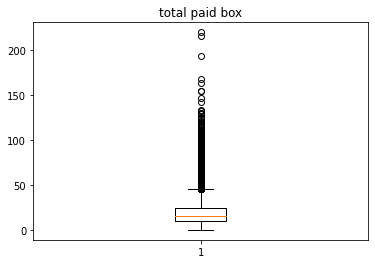

In [ ]:
plt.boxplot(fox_total_paid)
plt.title("total paid box")
plt.show()

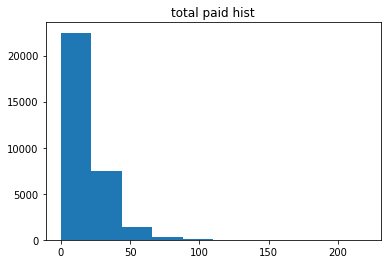

In [ ]:
plt.hist(fox_total_paid)
plt.title("total paid hist")

plt.show()

In [ ]:
fox_paiddeciles= pd.qcut(fox["total_paid"], q=10,duplicates='drop')

**Interpretation:** for total paid, the amount of the most payments are mainly restircted between 0 and 50, only a small proportion of the total paid is beyond 50 euro. and from the box plot is to conclude, there are a lot of outliers beyond the maximum Q3+1.5IQR, some extreme are above 200.

# Question 4

In [ ]:
pd.crosstab(fox["merchant_name"],fox_paiddeciles)


total_paid,"(-0.001, 6.74]","(6.74, 8.75]","(8.75, 10.68]","(10.68, 12.696]","(12.696, 15.0]","(15.0, 17.88]","(17.88, 21.64]","(21.64, 26.7]","(26.7, 36.176]","(36.176, 219.8]"
merchant_name,,,,,,,,,,
bolt,135,206,179,195,203,148,143,123,135,99
g7,1,12,28,52,78,126,207,233,294,481
heetch,102,198,135,145,162,140,155,173,156,112
kapten,501,533,479,530,537,531,591,574,527,498
lecab,0,0,0,2,1,0,4,6,6,19
marcel,29,9,7,20,21,10,16,24,26,34
uber,2423,2223,2356,2226,2192,2221,2063,2048,2033,1939


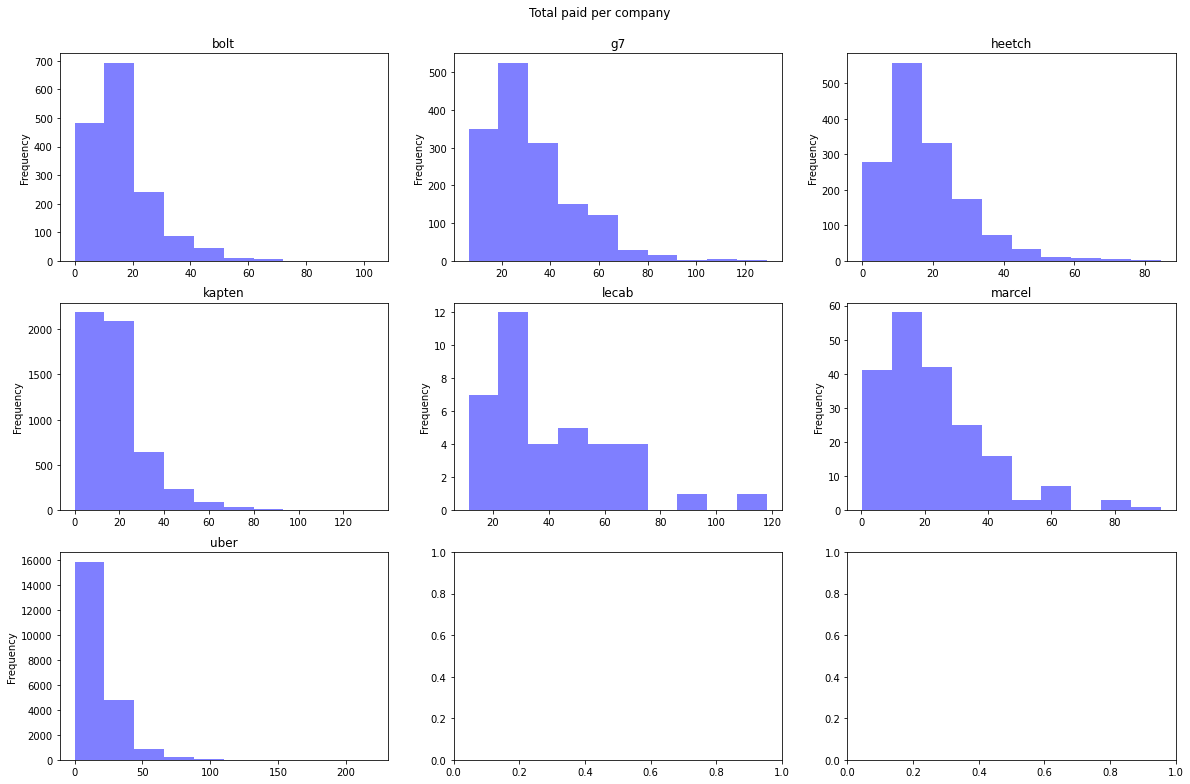

In [ ]:
#question 4
import numpy as np
f,axes=plt.subplots(3,3, figsize=(20, 13))
f.suptitle("Total paid per company", y=0.93)
names=np.unique(fox["merchant_name"])
for i in range(len(names)):
  totalpaid=fox[fox["merchant_name"].isin([names[i]])]["total_paid"]
  totalpaid.plot.hist(ax=axes[int(i/3),i%3], color='b', alpha = 0.5)
  axes[int(i/3),i%3].set_title(names[i])
plt.show()


**Interpretation: **
Uber occupies the most portion among all ride hailing.
Most people paid less than 20 euros for their travel.
And the expenses for the ridehailing are mostly distributed between 0 and 40 euros. Specifically, we can find that the frequency of total paid amount also varies among different companies. for example, 
for lecab, marcel as well as g7, the total paid amounts are relatively averagely distributed, while the total paid amounts of Uber and Kapten are heavily distributed in lower price level, which implies probably the different pricing, positioning or user preference of these ridehailing companies.


# Question 5

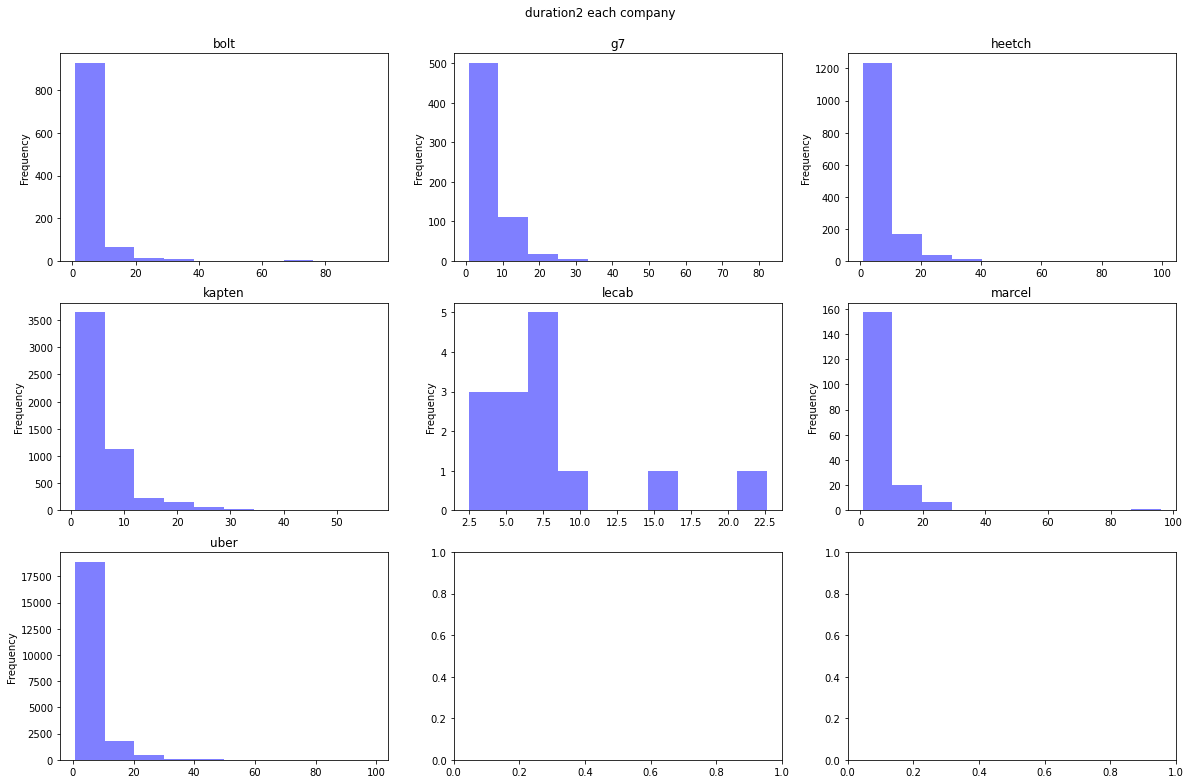

In [ ]:
R = 6373.0
import math
distance2=[]
for i in range(len(fox["departure_address_latitude"])):
  lat1 = math.radians(fox["departure_address_latitude"][i])
  lon1 = math.radians(fox["departure_address_longitude"][i])
  lat2 = math.radians(fox["arrival_address_latitude"][i])
  lon2 = math.radians(fox["arrival_address_longitude"][i])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
  distance = R * c
  distance2.append(distance)
fox["distance2"] = distance2
fox["distance2"] = np.where(fox["distance2"] > 100, np.NaN, fox["distance2"])
fox["distance2"] = np.where(fox["distance2"] <=0, np.NaN, fox["distance2"])

f,axes=plt.subplots(3,3, figsize=(20, 13))
f.suptitle("distance2 each company", y=0.93)
for i in range(len(names)):
  distance_floats=fox[fox["merchant_name"].isin([names[i]])]["distance2"]
  distance_floats.plot.hist(ax=axes[int(i/3),i%3], color='b', alpha = 0.5)
  axes[int(i/3),i%3].set_title(names[i])
plt.show()



**Interpretation:** from the histograms about the travel distance, we can find that the travel distances are almost under 20km, or more accurately, are mostly under 10 km. We can deduce from these statistcs that customers are prone to use ridehailing for short distance travel. The reason behind this phenomenon can be the higher price relative to public transport or the convenience of the metro and bus.


# Question 6

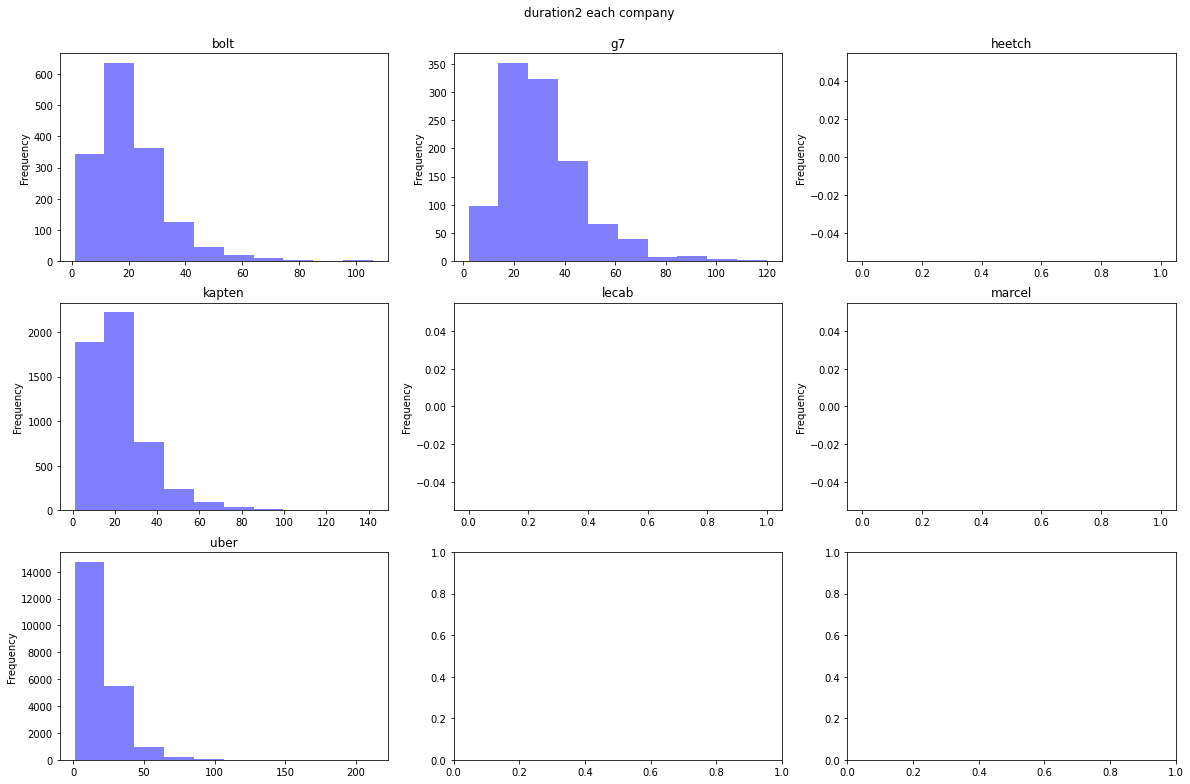

In [ ]:

a = pd.to_datetime(fox['arrival_time'])
b = pd.to_datetime(fox['departure_time'])
c = a - b

from datetime import timedelta
fox["duration2"]= c / timedelta(minutes=1)
fox["duration2"] = np.where(fox["duration2"] <= 0, fox["duration2"]+1440, fox["duration2"])
fox["duration2"] = np.where(fox["duration2"] > 500, np.NaN, fox["duration2"])


f,axes=plt.subplots(3,3, figsize=(20, 13))
f.suptitle("duration2 each company", y=0.93)

for i in range(len(names)):
  duration2=fox[fox["merchant_name"].isin([names[i]])]["duration2"]
  duration2.plot.hist(ax=axes[int(i/3),i%3], color='b', alpha = 0.5)
  axes[int(i/3),i%3].set_title(names[i])
plt.show()

Interpretation: Computed the variable “duration2”, we can accurately observe how the duration of a ride is  comprised between 20 and 40 minutes for companies like Bolt and G7,probably because of the lower marginal cost. Uber and Kapten seem to be more successful in an other sector of the market. On brief distances and short runs, they apparently are more efficient, and consequently more attractive.

# Question 7

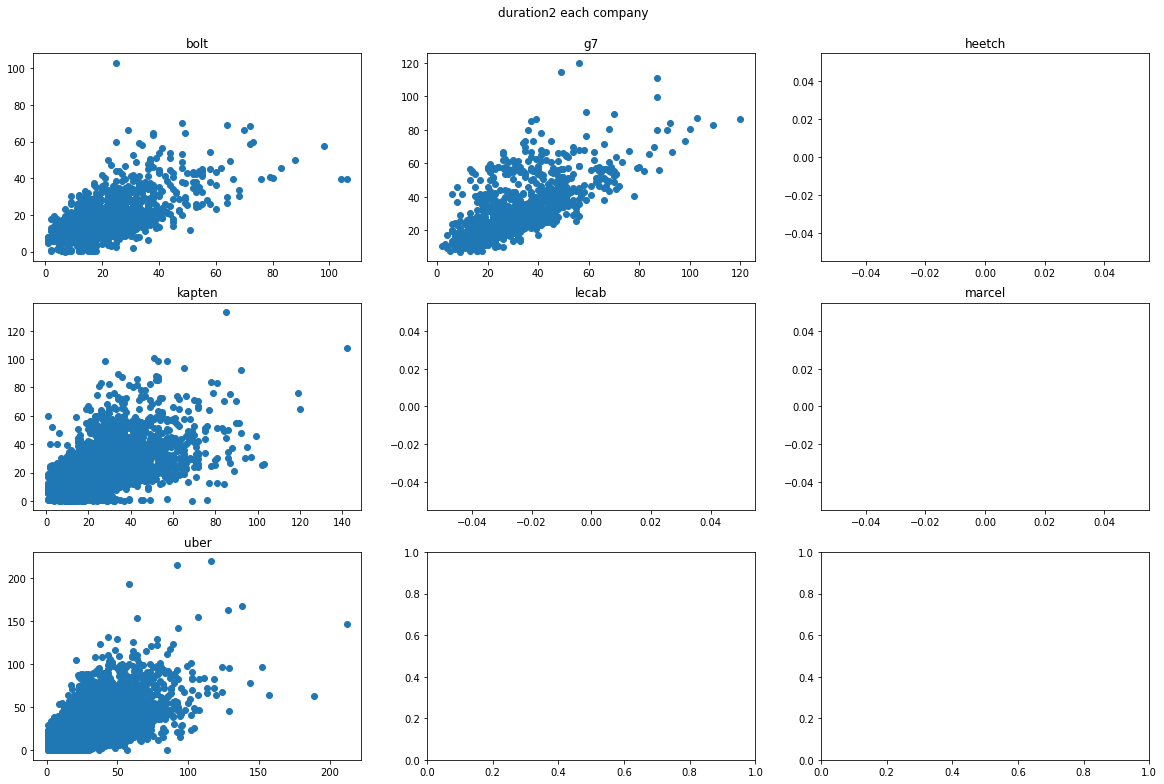

In [ ]:
#question7(1)
f,axes=plt.subplots(3,3, figsize=(20, 13))
f.suptitle("duration2 each company", y=0.93)
names=np.unique(fox["merchant_name"])
for i in range(len(names)):
  ax=axes[int(i/3),i%3]
  duration2=fox[fox["merchant_name"].isin([names[i]])]["duration2"]
  ax.scatter(duration2,fox[fox["merchant_name"].isin([names[i]])]["total_paid"])
  axes[int(i/3),i%3].set_title(names[i])
plt.show()



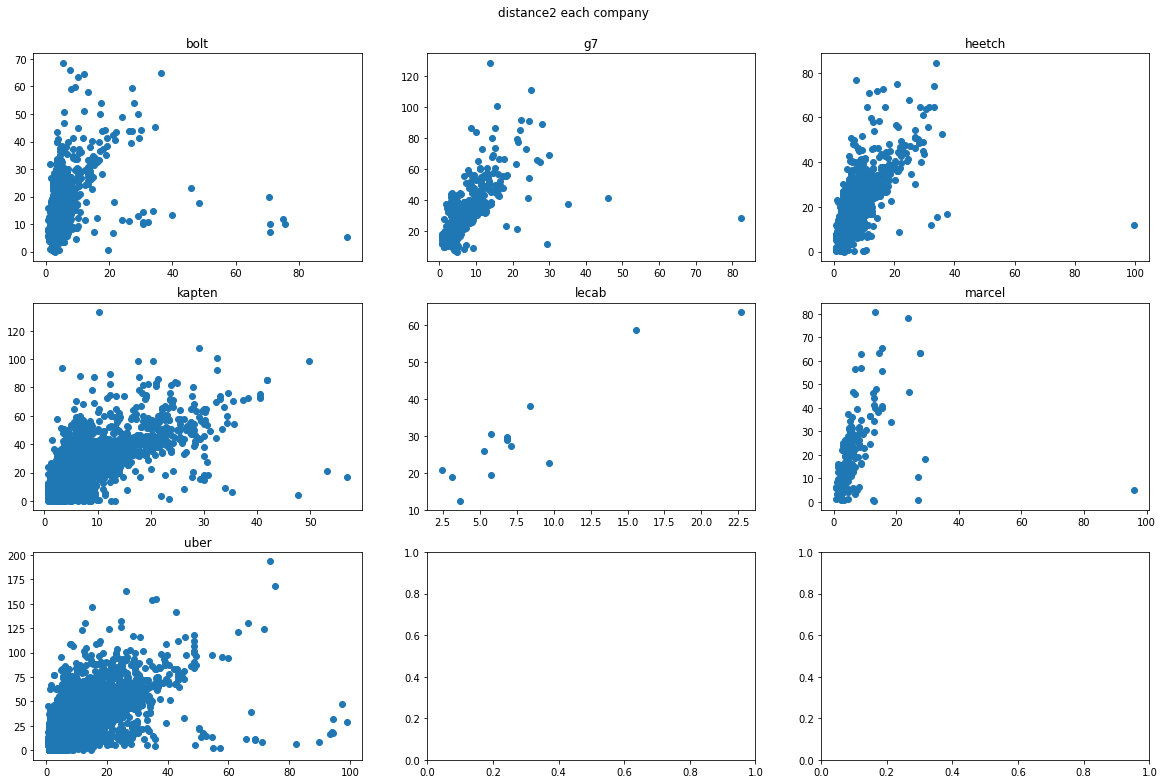

In [ ]:
#question7(2)
f,axes=plt.subplots(3,3, figsize=(20, 13))
f.suptitle("distance2 each company", y=0.93)
names=np.unique(fox["merchant_name"])
for i in range(len(names)):
  ax=axes[int(i/3),i%3]
  distance2=fox[fox["merchant_name"].isin([names[i]])]["distance2"]
  ax.scatter(distance2,fox[fox["merchant_name"].isin([names[i]])]["total_paid"])
  axes[int(i/3),i%3].set_title(names[i])
plt.show()


# Question 8

In [ ]:
#qusetion8
duration2_g7=fox[fox.merchant_name=="g7"].duration2
distance2_g7=fox[fox.merchant_name=="g7"].distance2
total_paid_g7=fox[fox.merchant_name=="g7"].total_paid
frames=[duration2_g7,distance2_g7,total_paid_g7]
g7=pd.concat(frames,axis=1)
g7.columns=["duration2","distance2","total_paid"]
g7.describe()

,duration2,distance2,total_paid
count,1073.000000,638.000000,1512.000000
mean,31.060578,6.723089,31.975384
std,16.044686,5.895573,17.384444
min,2.000000,0.731490,6.400000
25%,20.000000,3.336895,19.200000
50%,28.000000,5.125034,27.100000
75%,39.000000,8.122904,40.450000
max,120.000000,82.249513,129.000000


In [ ]:

duration2_uber=fox[fox.merchant_name=="uber"].duration2

distance2_uber=fox[fox.merchant_name=="uber"].distance2
total_paid_uber=fox[fox.merchant_name=="uber"].total_paid
frames1=[duration2_uber,distance2_uber,total_paid_uber]
uber=pd.concat(frames1,axis=1)
uber.columns=["duration2","distance2","total_paid"]
uber.describe()

,duration2,distance2,total_paid
count,21459.000000,21372.000000,21724.000000
mean,19.710797,5.863477,18.277290
std,13.724099,5.788648,13.974138
min,1.000000,0.643067,0.000000
25%,11.000000,2.524798,9.417500
50%,17.000000,4.283984,14.330000
75%,25.000000,6.947861,22.960000
max,212.000000,98.926215,219.800000


In [ ]:
duration2_kapten=fox[fox.merchant_name=="kapten"].duration2
distance2_kapten=fox[fox.merchant_name=="kapten"].distance2
total_paid_kapten=fox[fox.merchant_name=="kapten"].total_paid
frames2=[duration2_kapten,distance2_kapten,total_paid_kapten]
kapten=pd.concat(frames2,axis=1)
kapten.columns=["duration2","distance2","total_paid"]
kapten.describe()

,duration2,distance2,total_paid
count,5268.000000,5256.000000,5301.000000
mean,22.201215,6.052417,18.863113
std,14.036776,5.304502,13.310847
min,1.000000,0.730905,0.000000
25%,13.000000,2.925960,10.000000
50%,19.000000,4.508972,15.350000
75%,28.000000,7.086602,23.900000
max,142.000000,56.849316,133.230000


Interpretation: for G7 the mean duration of a single ride is relatively longer than the ones of Kapten and Uber. Kapten results to be the least expensive comparing the amount paid to the duration of a ride. G7 covers the longest rides. Uber seems to be more requested in brief-distance runs as shown in the previous results. G7 has the highest standard deviations in the 3 fields (duration, distance and total paid amount), this should imply less stable tariffs on the rides and more uncertainty on the result obtained. 

## Question 9

In [ ]:
#questions 9 95%confidence interval
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
companys=[uber,kapten,g7]
for i in companys:
    data = i["total_paid"]

    n = len(data)
    m = np.mean(data)
    std_err = sem(data)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)

    start = m - h
    print(start)
    end = m + h
    print(end)

18.09145513438603
18.463125053424555
18.560561342846785
19.284032837857712
31.09842112357683
32.85234607219042


The 95% confidence interval of "total paid" for UBER, Kapten and G7 are 

[18.09145513438603,18.463125053424555]

[18.50470760223955,19.22151763828115]

[31.09842112357683,32.85234607219042]

This means that we have 95% confidence at the statement that the computed intervals contains the mean of the "total paid".




# Question 10

In [ ]:
# assumption1: average duration of a ride is equal to 20 minutes
# asssumption2: average duration of a ride is not equal to 20 minutes
import scipy.stats
import scipy
from scipy import mean
from scipy import stats
data=kapten["duration2"]

n = len(data)
m = np.mean(data)
print(m)
std_err =sem(data,nan_policy='omit')

t=(m-20)/std_err
print(t)
p=2*(1-scipy.stats.t.cdf(t,df=n-1))
print("p-value is ",p)


22.22990045941807
11.477186590353881
p-value is  0.0


In [ ]:
import scipy
from scipy import mean

data=uber["duration2"]

n = len(data)
m = np.mean(data)
std_err =sem(data,nan_policy='omit')

t=(m-20)/std_err
print(t)
print(scipy.stats.t.ppf(0.005, n-1))
print(scipy.stats.t.ppf(0.995, n-1))
p=2*scipy.stats.t.cdf(t,df=n-1)
print("p-value is ",p)

-3.086904566377216
-2.5760556513979633
2.576055651397963
p-value is  0.002025071006450946


In [ ]:
import scipy
from scipy import mean

data=g7["duration2"]

n = len(data)
m = np.mean(data)
print(m)
std_err =sem(data,nan_policy='omit')

t=(m-20)/std_err
print(t)
print(scipy.stats.t.ppf(0.005, n-1))
print(scipy.stats.t.ppf(0.995, n-1))
p=2*(1-scipy.stats.t.cdf(t,df=n-1))
print("p-value is ",p)

31.06057781919851
22.58117019117476
-2.579087013598488
2.5790870135984876
p-value is  0.0


The purpose of this question was to know if whether it would acceptable to say (with a 1% significance level) that the average duration of a ride is equal to 20 minutes for Kapten, G7 and Uber.
Our null hypothesis was the average duration is 20 minutes,
the rejecting one is that the average is not equal to 20 minutes.

The p values for G7, Kapten and Uber are 0.0, 0.0 and 0.002025071006450946

We used the T test to test the hypothesis. According to our results, we can not accept the hypothesis that  the average duration of a ride is equal to 20 minutes for G7, Kapten and Uber.

## Question 11

In [ ]:
from scipy.stats import ttest_ind
uber3 = fox[fox["merchant_name"]=="uber"]
uberprice = uber3.total_paid
product_class = uber3.product_class
df6 = pd.DataFrame({"uberprice":uberprice,"class":product_class})
data1 = df6[df6["class"]=="pool"]["uberprice"]
data2 = df6[df6["class"]=="uberx"]["uberprice"]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.4f' % (stat, p))
if p > 0.01:
	print('uberx is not more expensive than pool')
else:
	print('uberx is more expensive than pool')

stat=-13.110, p=0.0000
uberx is more expensive than pool


What we wanted to know here is the company that is the more expensive, thanks to an equality of means and a t test we can conclude that with a significance level of 1%, Uber is more expensive than Pool
Here our p-value is equal to 0,000 since the value we found was -13,110

# Question 12

In [ ]:
import statsmodels.api as am 
import statsmodels.formula.api as ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
uber_new = uber[uber['total_paid']>0]
model_uber = ols("total_paid ~ duration2+distance2",data=uber_new).fit()
model_uber_summary = model_uber.summary()
print(model_uber_summary)
model_uber.params


                            OLS Regression Results                            
Dep. Variable:             total_paid   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                 1.353e+04
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:09:17   Log-Likelihood:                -75455.
No. Observations:               21076   AIC:                         1.509e+05
Df Residuals:                   21073   BIC:                         1.509e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0574      0.108     37.688      0.0

Intercept    4.057407
duration2    0.428409
distance2    0.980052
dtype: float64

In [ ]:
kapten_new = kapten[kapten['total_paid']>0]
model_kapten = ols("total_paid ~ duration2+distance2",data=kapten_new).fit()
model_kapten_summary = model_kapten.summary()
print(model_kapten_summary)
model_kapten.params

                            OLS Regression Results                            
Dep. Variable:             total_paid   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     3577.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:10:32   Log-Likelihood:                -18669.
No. Observations:                5219   AIC:                         3.734e+04
Df Residuals:                    5216   BIC:                         3.736e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9083      0.228     17.133      0.0

Intercept    3.908316
duration2    0.313257
distance2    1.330141
dtype: float64

In [ ]:
g7_new = g7[g7['total_paid']>0]
model_g7 = ols("total_paid ~ duration2+distance2",data=g7_new).fit()
model_g7_summary = model_g7.summary()
print(model_g7_summary)
model_g7.params

                            OLS Regression Results                            
Dep. Variable:             total_paid   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     615.6
Date:                Thu, 10 Dec 2020   Prob (F-statistic):          3.81e-130
Time:                        10:10:42   Log-Likelihood:                -1583.5
No. Observations:                 458   AIC:                             3173.
Df Residuals:                     455   BIC:                             3185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3021      0.749      7.077      0.0

Intercept    5.302055
duration2    0.574677
distance2    0.776510
dtype: float64

Interpretation: We used OLS model to do the regression analysis. R-squared coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R-squared of 1 indicates that the regression predictions perfectly fit the data.
The R-squired values of the three models are 0.562,0.578,0.730

P value: All the P value is 0.000, showing that the slope coefficients are significantly different from zero at the 1 percent confidence level.


# Question 13

We used T TEST to test this question. According to the results, at 5% significance level, it is statistically correct to say that the expected total
paid difference is 1 Euro for two different Uber rides of
the same duration but one of the rides is 1 kilometer longer . 
P value is 0.13382330892673042.

In [ ]:
t=(0.9805-1)/0.013
print(t)
print(scipy.stats.t.ppf(0.025, n-1))
print(scipy.stats.t.ppf(0.975, n-1))
p=2*scipy.stats.t.cdf(t,df=n-1)
print("p-value is ",p)


-1.4999999999999971
-1.9615352223411995
1.961535222341199
p-value is  0.13382330892673042


# Question 14

In [ ]:
import math
import numpy as np

R = 6373.0

lat1 = math.radians(48.851749736370245)
lon1 = math.radians(2.348260109532791)
lat2 = math.radians(48.947347149459155)
lon2 = math.radians(2.1538655694927153)
dlon = lon2 - lon1
dlat = lat2 - lat1

a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2

c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
distance_14 = R * c
print(distance_14)
duration_14 = 55

prediction=model_uber.predict(pd.DataFrame({'duration2':[55], 'distance2':[distance_14]}))
print(prediction)

17.751339618847926
0    45.017161
dtype: float64


48 is a reasonable price.

In [ ]:
prediction=model_kapten.predict(pd.DataFrame({'duration2':[55], 'distance2':[distance_14]}))
print(prediction)

0    44.749254
dtype: float64


In [ ]:
prediction=model_g7.predict(pd.DataFrame({'duration2':[55], 'distance2':[distance_14]}))
print(prediction)

0    50.693392
dtype: float64


Accoring to the prediction of the model, the expected price for the three company is 45.01, 44.75 and 50.69. Therefore, 47 euro is a reasonable price.

# Question 15


Q:What could you do to improve the precision of your prediction machine?

A:
1. A different model: 
Because now the R-squared values of models are not high, we should consider looking for another model. 
2. Bigger dataset: 
A bigger dataset makes the model more precise.
3. Treatment of NAN and outliers:
From the first several questions we can conclude that there are a lot of NANs and outliers. Getting more information about the real situation, we can come up with a more precise method for NANs and outlier treatment.
4. New features:
we can extract more information from existing data by creating new features. 

Q:Are there other ways to transform the available data in a new feature variable?

A:
I assume that the price depends on the duration, distance, number of availale riders and other factors, so i will add these new feature variables from existing data.

 1.Different time slot:
Price may vary from peak hours and normal hours, day-time and night-time.
2. Location:
Price may vary from orders in city and rural areas. The latitude and longtitude are know, so we can know this information.

Q：Is there external data which can be helpful

A：

1.Weather
The weather condition will affect the price, because the available riders may depend largely on the weather conditions. Also there might be outliers due to extreme weathers.
2. Discount
There might be discount on price in some period of time and this affect the demand of riders.
